# Abalone Data Set
### 4,178 records
## Objective - Predict whether the number of rings will be greater than 5 or not

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


From [UC Irvine ML Repository](https://archive.ics.uci.edu/ml/datasets/Abalone "Abalone") we can get a definition of the data set features as follows:

<h3><center> Table 1: Data Dictionary as Stated from UCI ML Repo </center></h3>

|Name | Data Type | Measurement Unit | Description|
|---:|:------|---------:|-----------:|
| Sex | nominal | -- | M, F, and I (infant) |
| Length | continuous | mm | Longest shell measurement |
| Diameter | continuous | mm | perpendicular to length |
| Height | continuous | mm | with meat in shell |
| Whole weight   | continuous | grams | whole abalone |
| Shucked weight | continuous | grams | weight of meat |
| Viscera weight | continuous | grams | gut weight (after bleeding) |
| Shell weight | continuous | grams | after being dried |
| Rings | integer | -- | +1.5 gives the age in years |

In [3]:
df = pd.read_csv('data/abalone.csv')
df.columns = [ '_'.join(c.lower().split()) for c in df.columns ]

<h3><center> Table 2: First 5 records of the file abalone.csv </center></h3>


``` Python 
df.head()
```
    
|    | sex   |   length |   diameter |   height |   whole weight |   shucked weight |   viscera weight |   shell weight |   rings |
|---:|:------|---------:|-----------:|---------:|---------------:|-----------------:|-----------------:|---------------:|--------:|
|  0 | M     |    0.455 |      0.365 |    0.095 |         0.514  |           0.2245 |           0.101  |          0.15  |      15 |
|  1 | M     |    0.35  |      0.265 |    0.09  |         0.2255 |           0.0995 |           0.0485 |          0.07  |       7 |
|  2 | F     |    0.53  |      0.42  |    0.135 |         0.677  |           0.2565 |           0.1415 |          0.21  |       9 |
|  3 | M     |    0.44  |      0.365 |    0.125 |         0.516  |           0.2155 |           0.114  |          0.155 |      10 |
|  4 | I     |    0.33  |      0.255 |    0.08  |         0.205  |           0.0895 |           0.0395 |          0.055 |       7 |



<h5><center> The abalone.csv data set has 4,177 rows which is consistent with the row count of the file.  
There are 9 columns, 8 of which are continuous. The column 'sex' is categorical with 3 values [M,F,I] </center></h5>


``` Python 
df.describe()
```
<h3><center> Table 3: Descriptive statistics for continuous features </center></h3>

|       |      length |     diameter |       height |   whole weight |   shucked weight |   viscera weight |   shell weight |      rings |
|:------|------------:|-------------:|-------------:|---------------:|-----------------:|-----------------:|---------------:|-----------:|
| count | 4177        | 4177         | 4177         |    4177        |      4177        |      4177        |    4177        | 4177       |
| mean  |    0.523992 |    0.407881  |    0.139516  |       0.828742 |         0.359367 |         0.180594 |       0.238831 |    9.93368 |
| std   |    0.120093 |    0.0992399 |    0.0418271 |       0.490389 |         0.221963 |         0.109614 |       0.139203 |    3.22417 |
| min   |    0.075    |    0.055     |    0         |       0.002    |         0.001    |         0.0005   |       0.0015   |    1       |
| 25%   |    0.45     |    0.35      |    0.115     |       0.4415   |         0.186    |         0.0935   |       0.13     |    8       |
| 50%   |    0.545    |    0.425     |    0.14      |       0.7995   |         0.336    |         0.171    |       0.234    |    9       |
| 75%   |    0.615    |    0.48      |    0.165     |       1.153    |         0.502    |         0.253    |       0.329    |   11       |
| max   |    0.815    |    0.65      |    1.13      |       2.8255   |         1.488    |         0.76     |       1.005    |   29       |


<h5><center> The minimum height for abalone is 0 which indicates that the data is possibly missing. Inspecting the records, there are only 2 that are missing 'height', we will need to impute these values or remove from data set. </center></h5>

``` Python 
df[ df.height==0 ]
```

<h3><center> Table 4: Records where height = 0.0 </center></h3>

|      | sex   |   length |   diameter |   height |   whole weight |   shucked weight |   viscera weight |   shell weight |   rings |
|-----:|:------|---------:|-----------:|---------:|---------------:|-----------------:|-----------------:|---------------:|--------:|
| 1257 | I     |    0.43  |       0.34 |        0 |          0.428 |           0.2065 |           0.086  |         0.115  |       8 |
| 3996 | I     |    0.315 |       0.23 |        0 |          0.134 |           0.0575 |           0.0285 |         0.3505 |       6 |

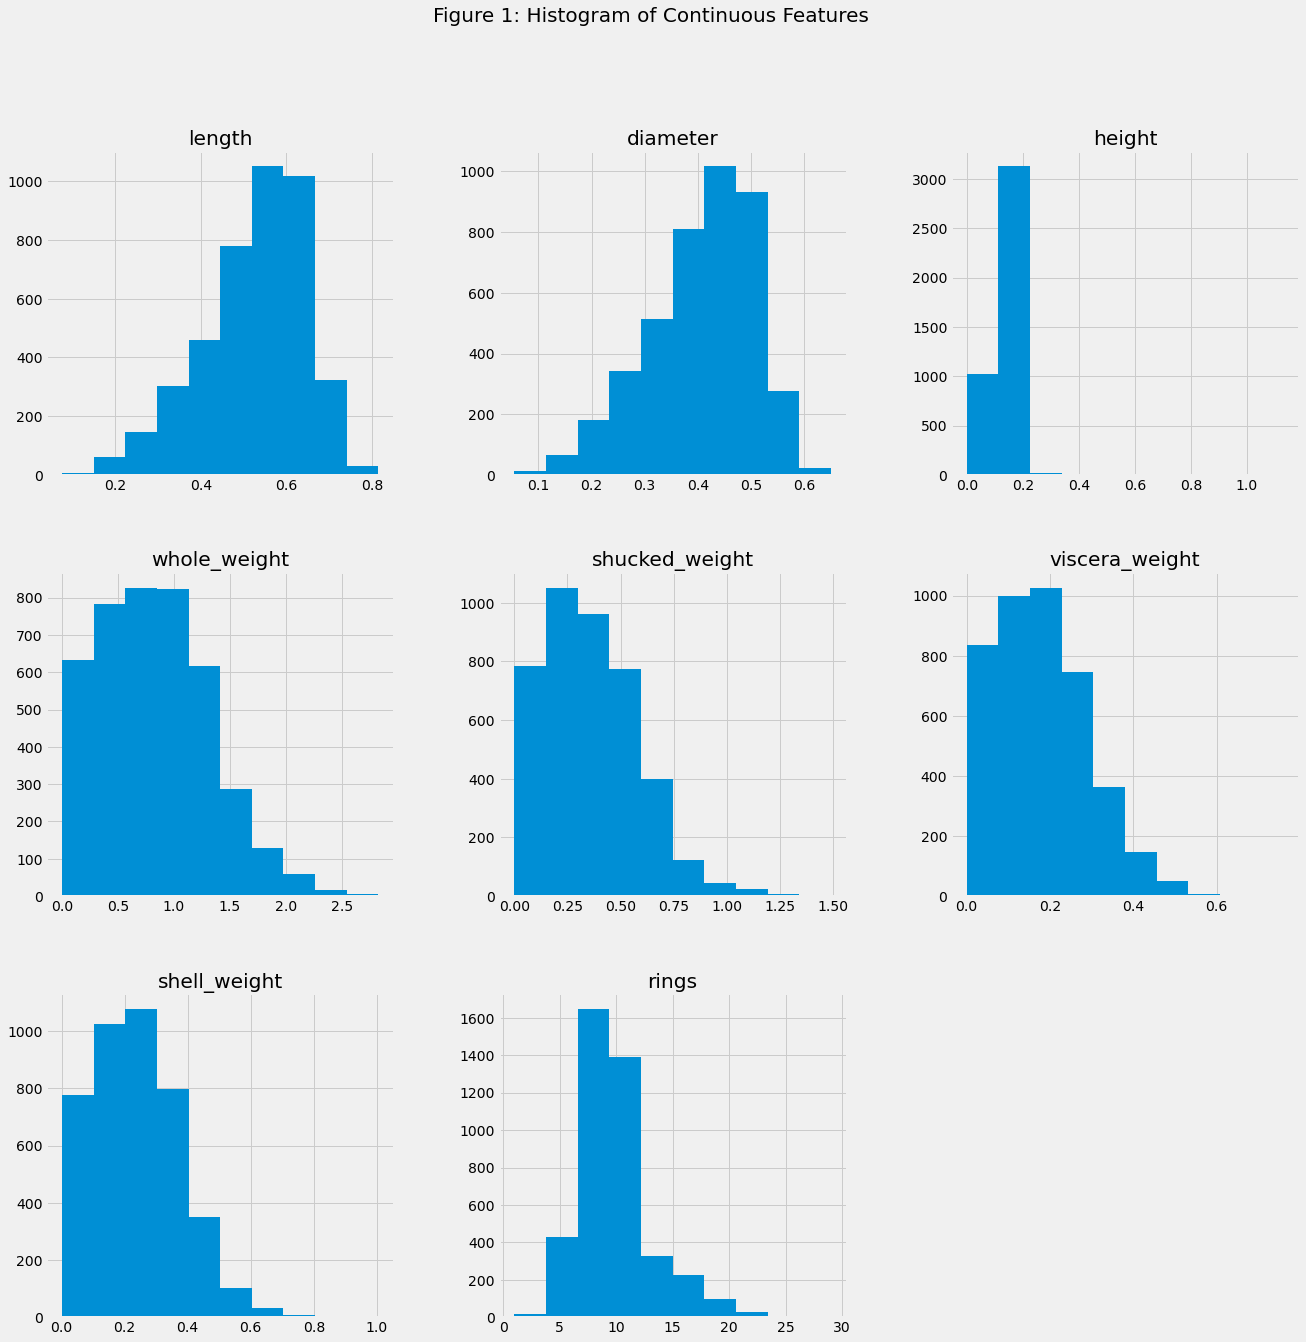

In [4]:
df.hist(figsize=(20,20))
plt.suptitle('Figure 1: Histogram of Continuous Features',fontsize=20)
plt.show()

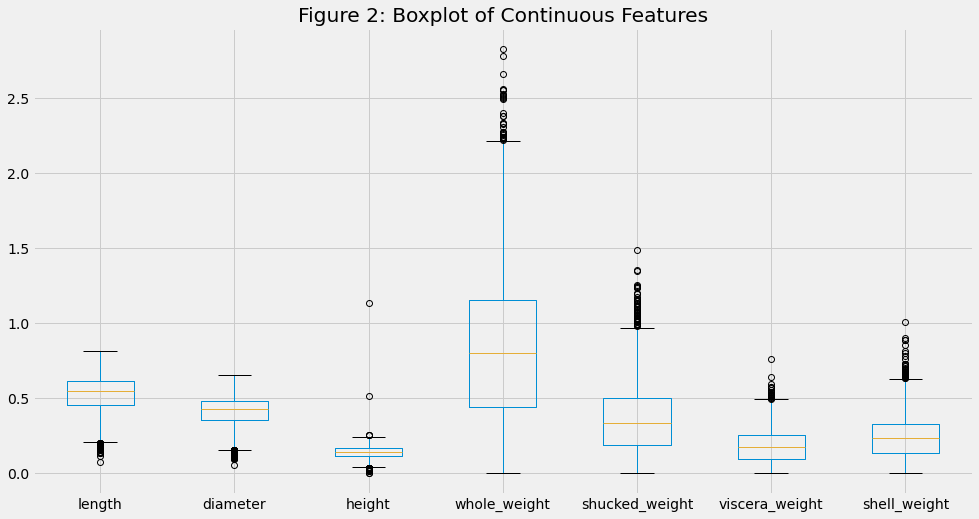

In [5]:
features = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
df[features].boxplot(figsize=(15,8))
plt.title('Figure 2: Boxplot of Continuous Features')
plt.show()

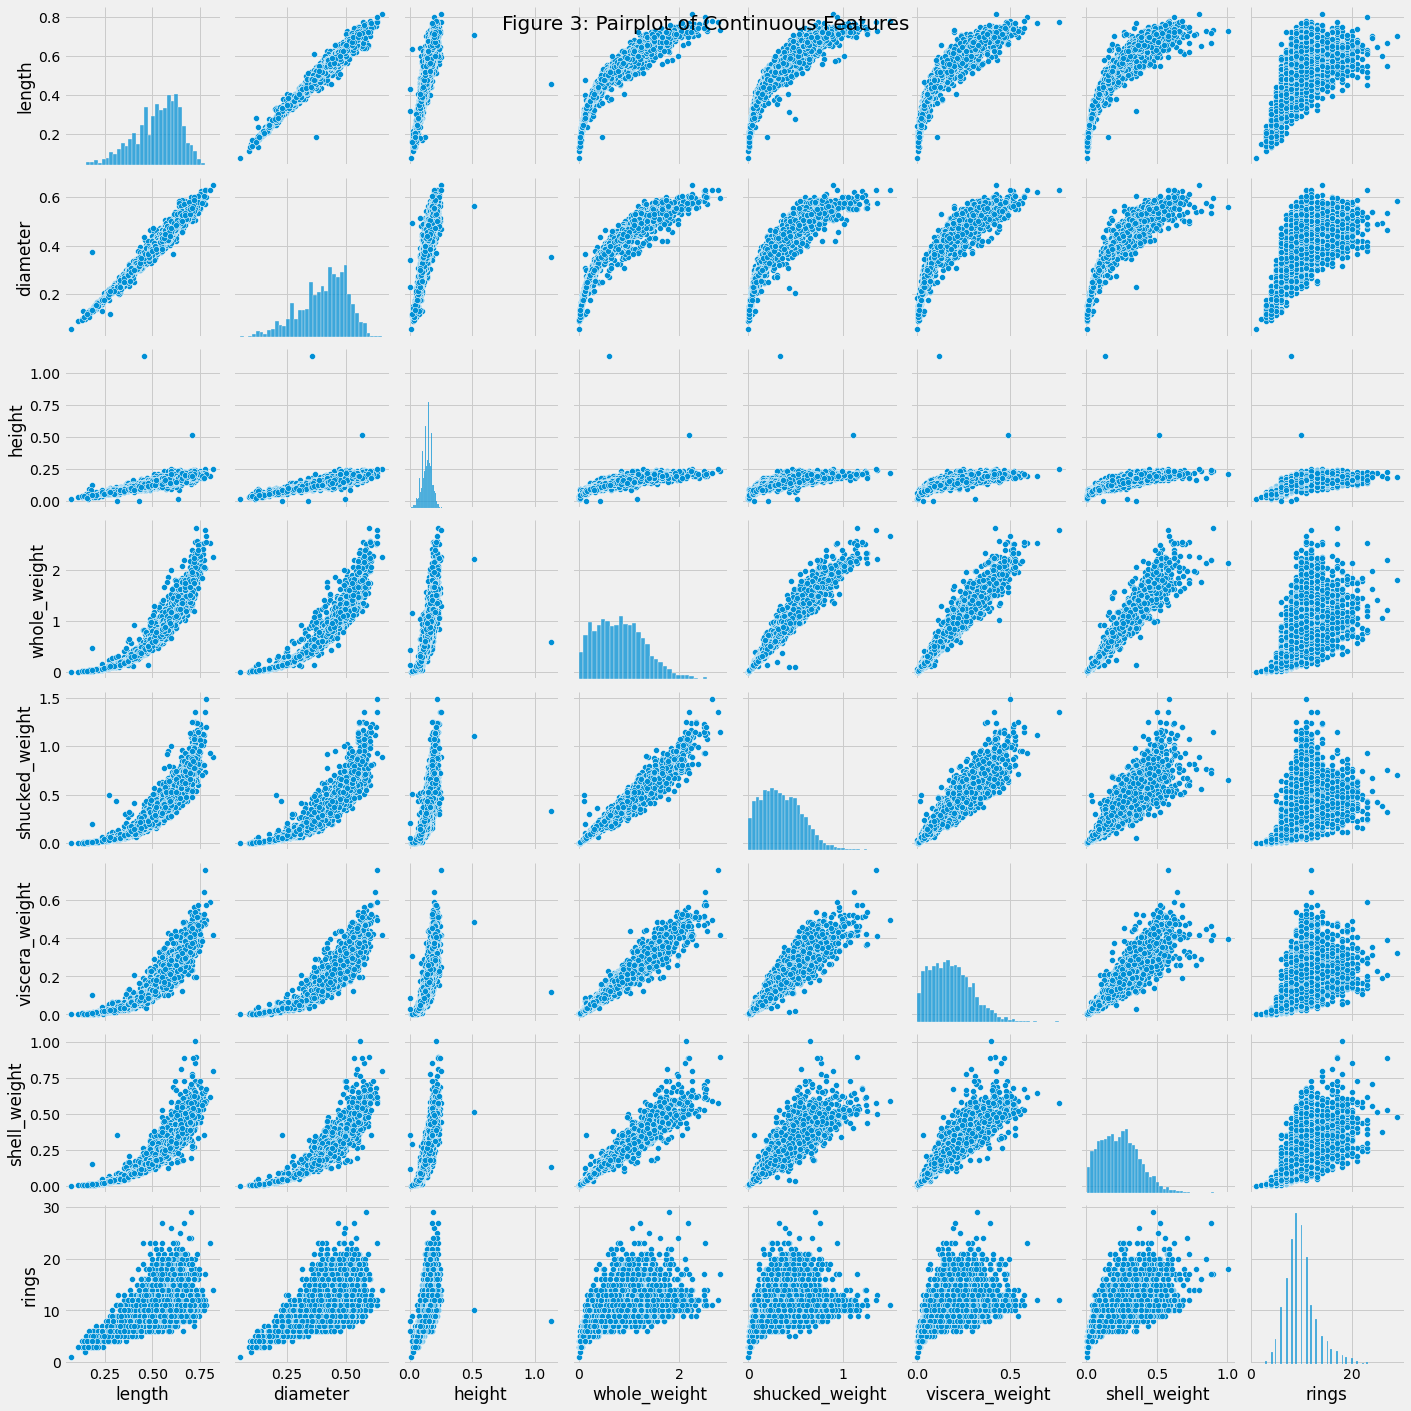

In [6]:
sns.pairplot(df)
plt.suptitle('Figure 3: Pairplot of Continuous Features',fontsize=20)
plt.show()

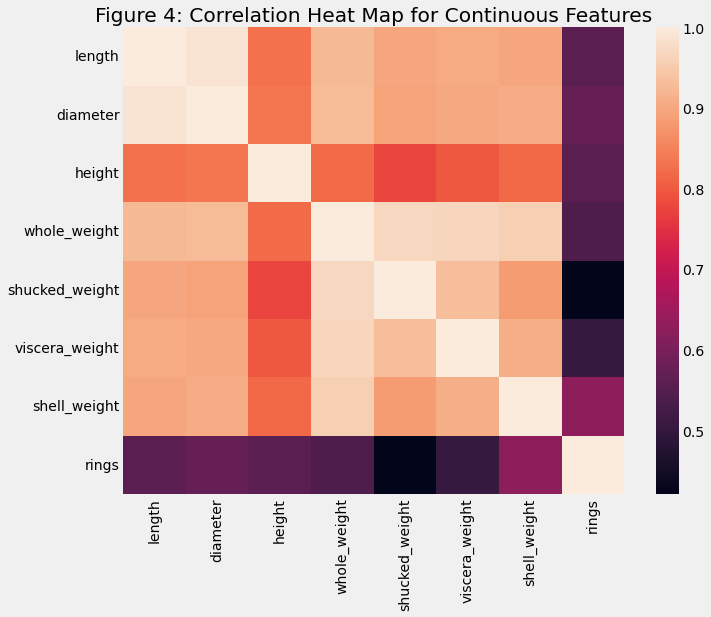

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title('Figure 4: Correlation Heat Map for Continuous Features')
plt.show()

### Correlation
From the Pair Plot and Heat map, we can see that there is high correlation between between the different weight features. This can cause multicolinearity in a model that we may need to account for. We can also see that the length and diameter are highly correlated.

### Weights

From the corrlelation of the weight features, it follows that the whole weight of an abalone should be greater than or equal to it's components. We can check this in the data by creating a weight delta feature as follows:

$ weight \Delta = whole weight - (shucked weight - viscera weight - shell weight) $

The weight $\Delta$ should be greater than 0 in all cases, as the whole weight should include some discard of the initial abalone not accouned for in the 3 parital weight features. However, we can see that there are records where the weight $\Delta$ is negative

``` Python
partial_weights = [ c for c in df.columns if 'weight' in c and 'whole' not in c ]
df['weight_delta'] = df.whole_weight - df[partial_weights].sum(axis=1)
df[ df.weight_delta < 0 ].describe()
df[ df.weight_delta < 0 ].head()
```

<h3><center> Table 5: Descriptive statistics for records with negative weight $\Delta$ </center></h3>

|       |     length |   diameter |      height |   whole_weight |   shucked_weight |   viscera_weight |   shell_weight |     rings |   weight_delta |
|:------|-----------:|-----------:|------------:|---------------:|-----------------:|-----------------:|---------------:|----------:|---------------:|
| count | 155        | 155        | 155         |     155        |       155        |       155        |     155        | 155       |  155           |
| mean  |   0.43929  |   0.34071  |   0.114968  |       0.514058 |         0.258294 |         0.131213 |       0.168913 |   8.13548 |   -0.0443613   |
| std   |   0.141915 |   0.116641 |   0.0440465 |       0.429191 |         0.230946 |         0.107514 |       0.13513  |   2.73998 |    0.0847893   |
| min   |   0.075    |   0.055    |   0         |       0.002    |         0.001    |         0.0005   |       0.0015   |   1       |   -0.4475      |
| 25%   |   0.3325   |   0.26     |   0.085     |       0.1635   |         0.07925  |         0.046    |       0.06325  |   6       |   -0.03025     |
| 50%   |   0.45     |   0.35     |   0.11      |       0.433    |         0.207    |         0.105    |       0.13     |   8       |   -0.011       |
| 75%   |   0.535    |   0.425    |   0.145     |       0.72175  |         0.3595   |         0.18725  |       0.2385   |   9.5     |   -0.00425     |
| max   |   0.725    |   0.58     |   0.24      |       2.21     |         1.351    |         0.4435   |       0.5085   |  19       |   -6.93889e-18 |

<h3><center> Table 6: First 5 records with negative weight $\Delta$ </center></h3>

|    | sex   |   length |   diameter |   height |   whole_weight |   shucked_weight |   viscera_weight |   shell_weight |   rings |   weight_delta |
|---:|:------|---------:|-----------:|---------:|---------------:|-----------------:|-----------------:|---------------:|--------:|---------------:|
| 42 | I     |    0.24  |      0.175 |    0.045 |         0.07   |           0.0315 |           0.0235 |          0.02  |       5 |        -0.005  |
| 43 | I     |    0.205 |      0.15  |    0.055 |         0.042  |           0.0255 |           0.015  |          0.012 |       5 |        -0.0105 |
| 44 | I     |    0.21  |      0.15  |    0.05  |         0.042  |           0.0175 |           0.0125 |          0.015 |       4 |        -0.003  |
| 45 | I     |    0.39  |      0.295 |    0.095 |         0.203  |           0.0875 |           0.045  |          0.075 |       7 |        -0.0045 |
| 46 | M     |    0.47  |      0.37  |    0.12  |         0.5795 |           0.293  |           0.227  |          0.14  |       9 |        -0.0805 |


Errors in measurement or data collection could possibly explain the inconsistencies in the weight features. Looking at `Figure 5`, we can see that many of the negative weight $\Delta$ values are close to 0 which may be due to rounding errors.

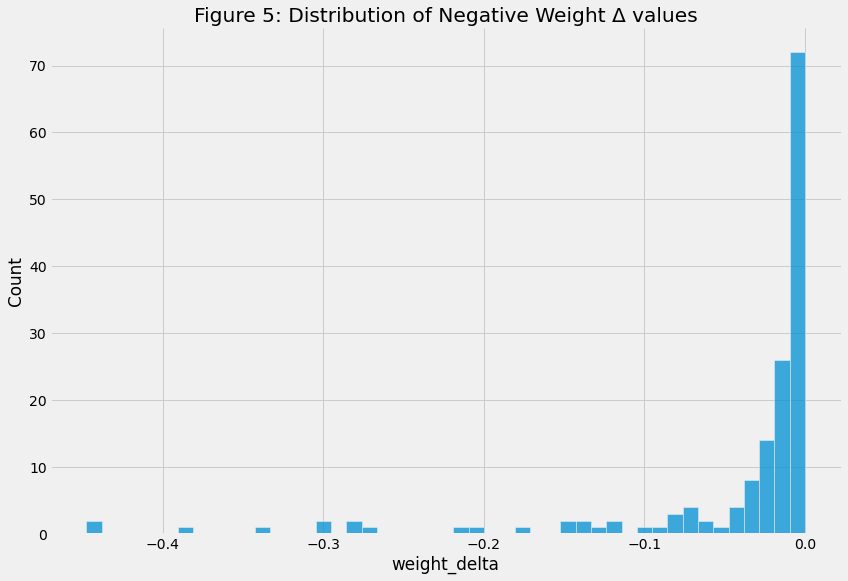

In [8]:
partial_weights = [ c for c in df.columns if 'weight' in c and 'whole' not in c ]
df['weight_delta'] = df.whole_weight - df[partial_weights].sum(axis=1)

sns.displot(df[ df.weight_delta < 0 ].weight_delta,height=8, aspect=1.5)
plt.title('Figure 5: Distribution of Negative Weight Δ values')
plt.show()

Text(0.5, 1.0, 'Figure 6: Distribution of Sex')

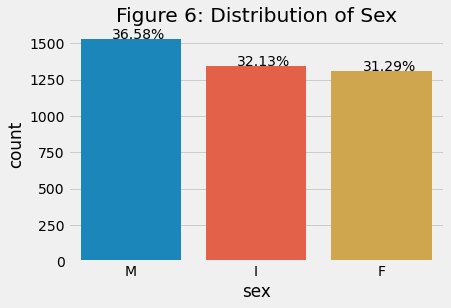

In [9]:
ax = sns.countplot(x=df['sex'],order=df.sex.value_counts().index)
# add % as label
for p, label in zip(ax.patches, df['sex'].value_counts()/df.shape[0]):
    ax.annotate(f'{label:.2%}', (p.get_x()+0.25, p.get_height()+0.1))
plt.title('Figure 6: Distribution of Sex')

There is a slightly higher representation of males in the data set in relationship to females and infants as seen in `Figure 6`

### Creating response variable
The objective is to predict whether or not an observation will have greater than 5 rings or not. Currently rings is a continuous variable that we will need to convert into a binary variable that will end up being the response variable of any modeling.

`Figure 7` shows the distribution of records that have rings greater than 5. 95% of the data set has a more than 5 rings, we will have to consider different sampling methods in order to account for this in modeling.

Text(0.5, 1.0, 'Figure 7: Distribution of Response\nRings > 5')

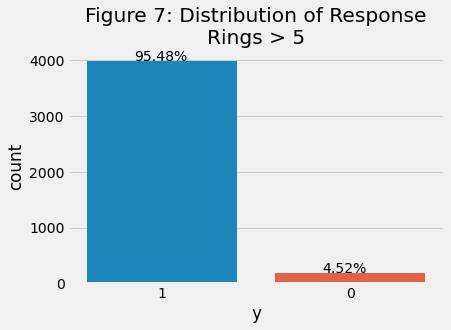

In [11]:
df['y'] = (df.rings > 5).astype(np.int16)
ax = sns.countplot(x=df.y,order=df.y.value_counts().index)

for p, label in zip(ax.patches, df['y'].value_counts()/df.shape[0]):
    ax.annotate(f'{label:.2%}', (p.get_x()+0.25, p.get_height()+0.1))
plt.title('Figure 7: Distribution of Response\nRings > 5')

In [290]:
# save response and created weight delta feature
# df.to_csv('data/abalone2.csv',index=False)

# Summary
1. Many of the features are correlated
    * Will have to use methods of feature selection to avoid multicollinearity
2. The response variable is highly imbalanced 
    * Imbalanced data can overwhelm a model towards the majority class
    * Will need to handle using sampling methods
3. There are some data issues that we may need to handle
    * Missing height
    * Negative weight $\Delta$